1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
import pandas as pd

df = pd.read_csv('HomeWork-churn_rate_prediction.csv')
df.head()
#ToDo: Show histogram of dataframe

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [62]:
df.iloc[:, 0:9].head(7)

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No
5,fffe43004900440036003300320035003300,Leslie Browder,13,M,PSG1LGF,City,Gold Membership,2016-01-08,No
6,fffe43004900440031003100360037003900,Bridget Balog,21,M,R3CX1EA,Town,Gold Membership,2015-03-19,Yes


In [63]:
df.iloc[:, 9:17].head(7)

,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value
0,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25
1,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38
2,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00
3,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56
4,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66
5,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,06:46:07,23,433.62,13884.77
6,CID24708,Gift Vouchers/Coupons,Desktop,Mobile_Data,11:40:04,10,55.38,8982.50


In [64]:
df.iloc[:, 17:len(df.columns)].head(7)

,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5
5,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,3
6,28.0,756.21,Yes,No,Yes,Solved in Follow-up,No reason specified,3


## Data Analysis

In [65]:
# Data analysis
# Todo: analyze your data here

In [66]:
display(len(df.columns))
display(len(df))

25

36992

In [67]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [68]:
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [69]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [70]:
df[categorical_cols].describe(include='all')

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,36992,36992,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


In [71]:
for i in range(len(categorical_cols)-4,len(categorical_cols)):
    display(df[categorical_cols[i]].value_counts())

offer_application_preference
Yes    20440
No     16552
Name: count, dtype: int64

past_complaint
No     18602
Yes    18390
Name: count, dtype: int64

complaint_status
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: count, dtype: int64

feedback
Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: count, dtype: int64

In [72]:
df['internet_option'].value_counts()

internet_option
Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: count, dtype: int64

In [73]:
df['medium_of_operation'].value_counts()

medium_of_operation
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: count, dtype: int64

In [74]:
df['preferred_offer_types'].value_counts()

preferred_offer_types
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: count, dtype: int64

In [75]:
df['joined_through_referral'].value_counts()

joined_through_referral
No     15839
Yes    15715
?       5438
Name: count, dtype: int64

In [76]:
df['membership_category'].value_counts()

membership_category
Basic Membership       7724
No Membership          7692
Gold Membership        6795
Silver Membership      5988
Premium Membership     4455
Platinum Membership    4338
Name: count, dtype: int64

In [77]:
df['region_category'].value_counts()

region_category
Town       14128
City       12737
Village     4699
Name: count, dtype: int64

In [78]:
df['gender'].value_counts()

gender
F          18490
M          18443
Unknown       59
Name: count, dtype: int64

<Axes: xlabel='churn_risk_score', ylabel='Count'>

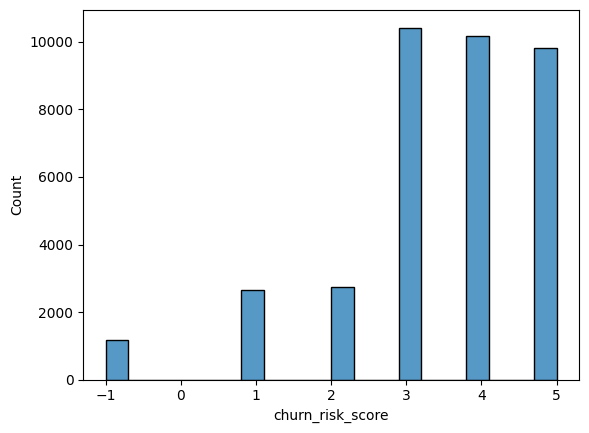

In [79]:
sns.histplot(x=df['churn_risk_score'],bins=20)

In [80]:
display(sum(df['churn_risk_score']==-1))
display(sum(df['churn_risk_score']==0))

1163

0

<Axes: xlabel='days_since_last_login', ylabel='Count'>

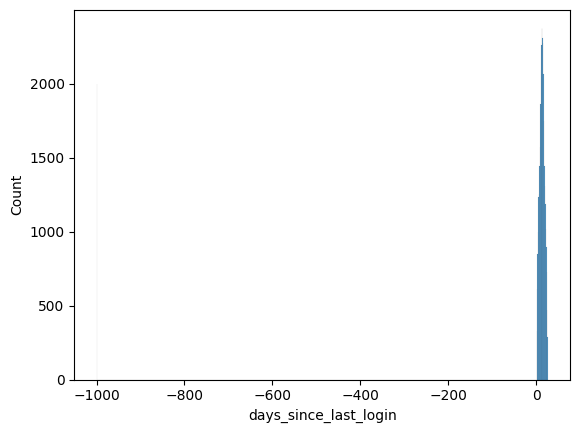

In [81]:
sns.histplot(x=df['days_since_last_login'],bins=1000)

In [82]:
sum(df['days_since_last_login']<0)

1999

In [83]:
sum(df['avg_time_spent']<0)

1719

## Preprocessing

In [84]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.dropna()    
    df = df[(df['days_since_last_login']>0)]
    df = df[(df['avg_time_spent'] >=0)]
    df = df[(df['churn_risk_score']>0)]
    df = df[(df['gender']!='Unknown')]
    df = df[(df['joined_through_referral']!='?')]
    df = df[(df['medium_of_operation']!='?')]
    df.drop("customer_id", axis=1, inplace=True)
    df.drop('Name', axis=1, inplace=True)
    df.drop('security_no', axis=1, inplace=True)
    df.drop('joining_date', axis=1, inplace=True)
    df.drop('referral_id', axis=1, inplace=True)
    df.drop('last_visit_time',axis=1, inplace=True)
    df.drop('avg_frequency_login_days',axis=1, inplace=True)
    return df

In [85]:
df = preprocessing_data(df.copy())

## Feature Engineering

<Axes: >

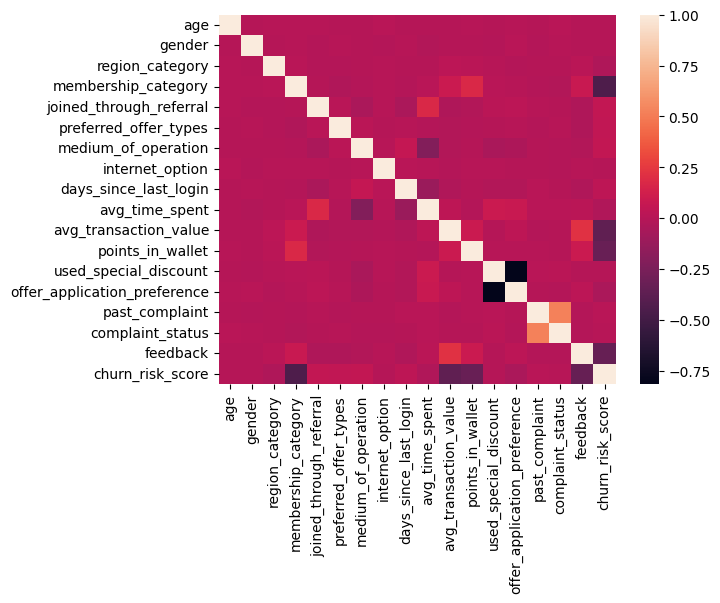

In [86]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
    for col in categorical_cols:
        df[col] = df[col].astype('category').cat.codes

    return df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [87]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop('churn_risk_score',axis=1)
    y = df.churn_risk_score
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [88]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 100
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [89]:
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(
        DecisionTreeClassifier()
    )
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

model=build_model(trainX,trainY)
pred = model.predict(testX)

In [90]:
def calculate_performance(y_true, y_pred):
    """
    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """

    # Todo: return your error value like accuracy, f1score, ...
    prec=precision_score(y_pred=y_pred,y_true=y_true, average='micro')
    recall=recall_score(y_pred=y_pred,y_true=y_true, average='micro')
    f1=f1_score(y_pred=y_pred, y_true=y_true, average='micro')
    acc=accuracy_score(y_pred=y_pred, y_true=y_true)
    print("precision", prec)
    print("recall", recall)
    print("accuracy", acc)
    print("F1", f1)

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1
    return main_score
calculate_performance(y_true=testY,y_pred=pred)

precision 0.7844189489267209
recall 0.7844189489267209
accuracy 0.7844189489267209
F1 0.784418948926721


0.784418948926721

In [91]:
from sklearn.ensemble import RandomForestClassifier

def build_model_RF(X, y):
    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(
        RandomForestClassifier()
    )
    # Todo: fit your model with X, y
    model.fit(X,y)
    return model

In [92]:
model_RF=build_model_RF(trainX,trainY)
pred_RF = model_RF.predict(testX)
calculate_performance(y_true=testY,y_pred=pred_RF)

precision 0.7940414507772021
recall 0.7940414507772021
accuracy 0.7940414507772021
F1 0.7940414507772021


0.7940414507772021

In [1]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Other conclusion: f1-score đánh giá hiệu quả của một mô hình dựa trên cả precision và recall. Khi một mô hình có cả precision và recall đều cao thì f1-score sẽ đạt giá trị cao nhất, và khi một trong hai chỉ số này thấp, F1-score cũng sẽ giảm. Điều này có nghĩa là f1-score sẽ đánh giá chất lượng của mô hình theo cách tổng thể hơn so với các chỉ số precision và recall riêng lẻ. Trong nhiều trường hợp, F1-score là một phép đo tổng hợp tốt hơn cho hiệu quả của mô hình, đặc biệt là khi tỷ lệ các class trong dữ liệu là chênh lệch."